# Analiza cen domów w King County

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Wstępna analiza

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [38]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Wstępne wnioski
21597 rekordów, 21 cech. Dane są kompletne. Kilka kolumn będzie do wyrzucenia. Najpierw zrobimy EDA potem modelowanie z użyciem Keras. Przewidujemy cenę (price).

## Analiza szczegółowa
Najpierw sprawdzimy wartości cen na wykresie.

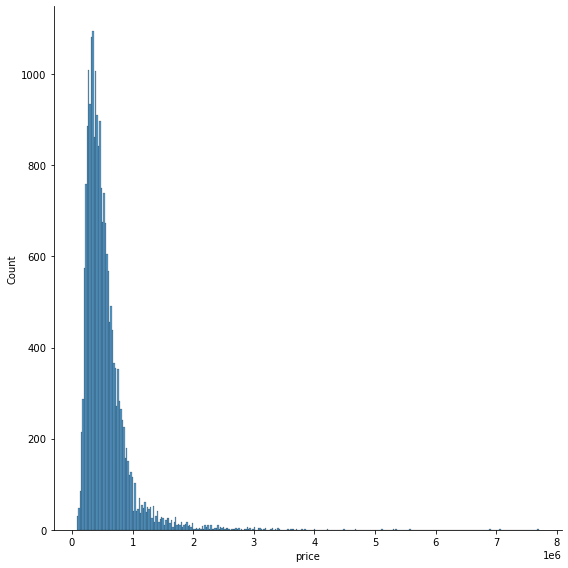

In [54]:
sns.displot(df['price'], height=8);

Wykres, który sięga daleko, a nie ma widocznych wartości w dalszej części oznacza, że będziemy mieli do czynienia z outlierami.
Zanim się nimi zajmiemy zobaczymy co ma wpływ na cenę.

In [46]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

Największą korelację z ceną ma powierzchnia mieszkania. Zobaczymy jak to wygląda na wykresie.

Text(0.5, 1.0, 'Cena a powierzchnia')

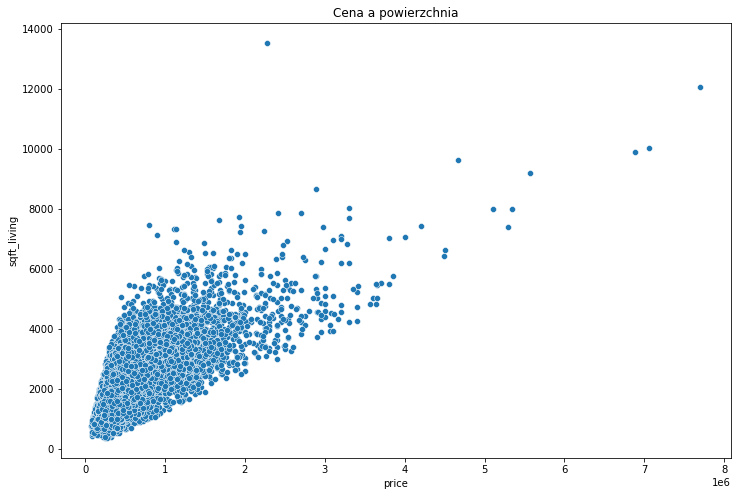

In [60]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='price', y = 'sqft_living', data = df)
plt.title('Cena a powierzchnia')

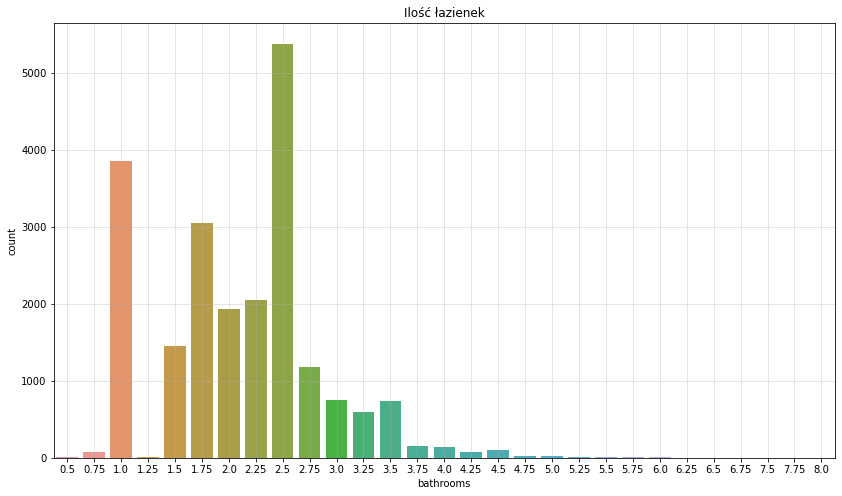

In [57]:
plt.figure(figsize=(14,8))

sns.countplot(x=df['bathrooms'])
plt.title('Ilość łazienek')
plt.grid(visible = True, alpha = 0.4)

Średnio od 1 do 3 łazienek na dom.

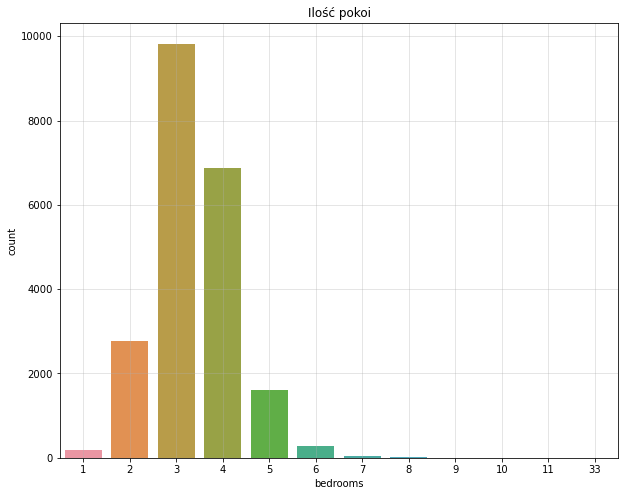

In [48]:
plt.figure(figsize=(10,8))

sns.countplot(x=df['bedrooms'])
plt.title('Ilość pokoi')
plt.grid(visible = True, alpha = 0.4)

Większość domów (mieszkań) ma od 2 do 5 pokoi.

Jak widzieliśmy wcześniej dataset zawiera outliery. Zobaczmy jak się prezentują najwyższe wartości cen.

In [25]:
df.sort_values('price', ascending = False)['price'].head(20).iloc[20:]

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
8629     4490000.0
12358    4210000.0
4145     4000000.0
2083     3850000.0
7028     3800000.0
19002    3800000.0
16288    3710000.0
18467    3650000.0
6502     3650000.0
15241    3640000.0
19133    3640000.0
Name: price, dtype: float64

Na potrzeby modelowania, najwyższe wartości zostaną później usunięte.

Zobaczymy jak prezentują się ceny w zależności od położenia. W tym celu odrzucimy najdroższe 100 rekordów.

In [110]:
non_top = df.sort_values('price', ascending = False).iloc[100:]

<AxesSubplot:xlabel='long', ylabel='lat'>

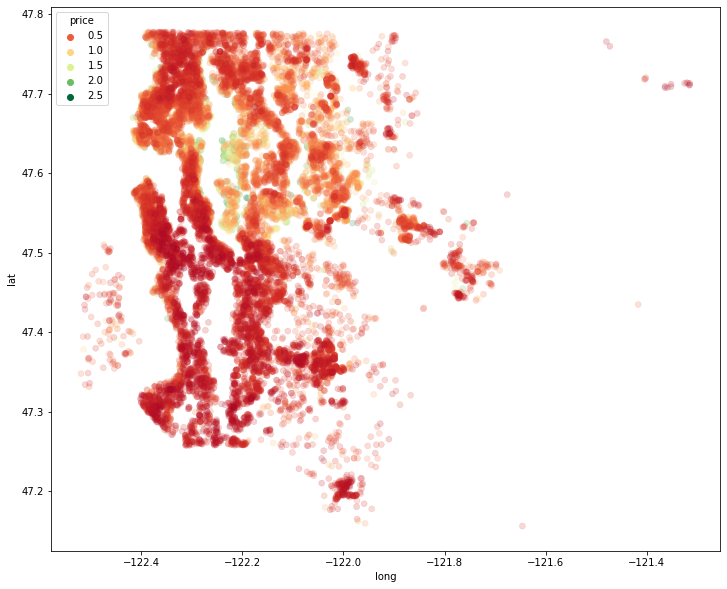

In [109]:
plt.figure(figsize=(12,10))

sns.scatterplot(x= 'long', y='lat', data = non_top, alpha = 0.2, hue= 'price', edgecolor = None, palette='RdYlGn')

Domy naniesione na współrzędne tworzą mapę hrabstwa King. Widać, że najwyższe ceny osiągają nieruchomości położone w samym Seattle, zwłaszcza przy brzegu.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

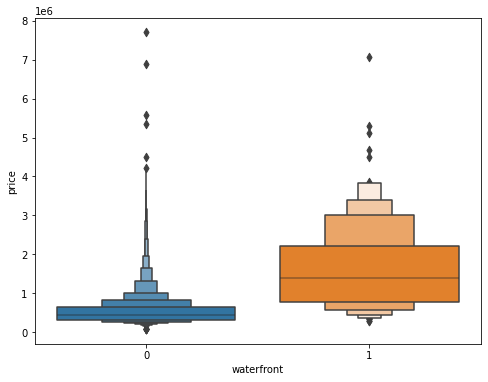

In [70]:
plt.figure(figsize=(8,6))

sns.boxenplot(x= 'waterfront', y = 'price', data = df)

Wykres potwierdza, że koszt nieruchomości z waterfrontem jest większy

Kilka kolumn można usunąć z datasetu, ponieważ nie będą miały wpływu na cenę.

In [71]:
df = df.drop(['id', 'zipcode'], axis = 1)

Sprawdźmy jak prezentują się dane z datami budowy i remontu.

In [73]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [74]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Dane dotyczące renowacji mogą być mylące, dom wyremontowany w zeszłym wieku prawdopodobnie będzie w gorszym stanie niż nieremontowany ale wybudowany w 2014 roku.

In [75]:
df = df.drop('yr_renovated', axis = 1)

In [76]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [78]:
df = df.drop('date', axis = 1)

<AxesSubplot:xlabel='year'>

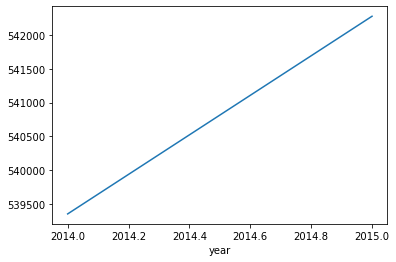

In [93]:
df.groupby('year')['price'].mean().plot()

W 2015 ceny były wyższe niż w 2014

<AxesSubplot:xlabel='month'>

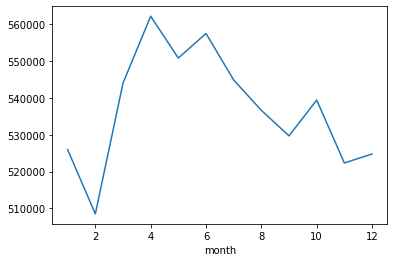

In [92]:
df.groupby('month')['price'].mean().plot()

Wykres cen w zależności od miesiąca. W środku roku ceny są wyższe.

## Modelowanie

In [136]:
out_df = df[(df['price'] < 400000) & (df['price'] > 10000)]

In [137]:
X = out_df.drop('price', axis = 1).values
y = out_df['price'].values

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(6510, 18)

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mse')

In [140]:
model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), batch_size = 128, epochs = 300)

Epoch 1/300
51/51 [==============================] - 0s 2ms/step - loss: 89485787136.0000 - val_loss: 90768875520.0000
Epoch 2/300
51/51 [==============================] - 0s 1ms/step - loss: 89483812864.0000 - val_loss: 90763599872.0000
Epoch 3/300
51/51 [==============================] - 0s 960us/step - loss: 89466462208.0000 - val_loss: 90722893824.0000
Epoch 4/300
51/51 [==============================] - 0s 973us/step - loss: 89363177472.0000 - val_loss: 90515759104.0000
Epoch 5/300
51/51 [==============================] - 0s 971us/step - loss: 88950022144.0000 - val_loss: 89794740224.0000
Epoch 6/300
51/51 [==============================] - 0s 956us/step - loss: 87708024832.0000 - val_loss: 87828455424.0000
Epoch 7/300
51/51 [==============================] - 0s 1ms/step - loss: 84712251392.0000 - val_loss: 83488153600.0000
Epoch 8/300
51/51 [==============================] - 0s 940us/step - loss: 78719000576.0000 - val_loss: 75436728320.0000
Epoch 9/300
51/51 [===================

51/51 [==============================] - 0s 995us/step - loss: 2641030400.0000 - val_loss: 2632300544.0000
Epoch 70/300
51/51 [==============================] - 0s 999us/step - loss: 2628998656.0000 - val_loss: 2620860928.0000
Epoch 71/300
51/51 [==============================] - 0s 957us/step - loss: 2619450368.0000 - val_loss: 2608942336.0000
Epoch 72/300
51/51 [==============================] - 0s 937us/step - loss: 2609973760.0000 - val_loss: 2600063488.0000
Epoch 73/300
51/51 [==============================] - 0s 956us/step - loss: 2600192768.0000 - val_loss: 2589996032.0000
Epoch 74/300
51/51 [==============================] - 0s 937us/step - loss: 2591069952.0000 - val_loss: 2578676224.0000
Epoch 75/300
51/51 [==============================] - 0s 977us/step - loss: 2581536512.0000 - val_loss: 2571271936.0000
Epoch 76/300
51/51 [==============================] - 0s 937us/step - loss: 2571310336.0000 - val_loss: 2560593664.0000
Epoch 77/300
51/51 [==============================] -

51/51 [==============================] - 0s 995us/step - loss: 2285929728.0000 - val_loss: 2272285440.0000
Epoch 138/300
51/51 [==============================] - 0s 957us/step - loss: 2282012928.0000 - val_loss: 2273753856.0000
Epoch 139/300
51/51 [==============================] - 0s 957us/step - loss: 2280047616.0000 - val_loss: 2270234112.0000
Epoch 140/300
51/51 [==============================] - 0s 997us/step - loss: 2278659328.0000 - val_loss: 2281992448.0000
Epoch 141/300
51/51 [==============================] - 0s 997us/step - loss: 2276672512.0000 - val_loss: 2269079296.0000
Epoch 142/300
51/51 [==============================] - 0s 941us/step - loss: 2279037184.0000 - val_loss: 2267985664.0000
Epoch 143/300
51/51 [==============================] - 0s 976us/step - loss: 2275238912.0000 - val_loss: 2277785600.0000
Epoch 144/300
51/51 [==============================] - 0s 930us/step - loss: 2275973120.0000 - val_loss: 2279881984.0000
Epoch 145/300
51/51 [=========================

51/51 [==============================] - 0s 923us/step - loss: 2247806208.0000 - val_loss: 2257304064.0000
Epoch 206/300
51/51 [==============================] - 0s 1ms/step - loss: 2246382080.0000 - val_loss: 2254769664.0000
Epoch 207/300
51/51 [==============================] - 0s 1ms/step - loss: 2247681536.0000 - val_loss: 2256124672.0000
Epoch 208/300
51/51 [==============================] - 0s 999us/step - loss: 2247738368.0000 - val_loss: 2261768192.0000
Epoch 209/300
51/51 [==============================] - 0s 997us/step - loss: 2246295552.0000 - val_loss: 2257158400.0000
Epoch 210/300
51/51 [==============================] - 0s 992us/step - loss: 2246097408.0000 - val_loss: 2254619904.0000
Epoch 211/300
51/51 [==============================] - 0s 977us/step - loss: 2249646592.0000 - val_loss: 2265638656.0000
Epoch 212/300
51/51 [==============================] - 0s 997us/step - loss: 2246405120.0000 - val_loss: 2266168064.0000
Epoch 213/300
51/51 [=============================

51/51 [==============================] - 0s 1ms/step - loss: 2239428096.0000 - val_loss: 2264646144.0000
Epoch 274/300
51/51 [==============================] - 0s 959us/step - loss: 2240490496.0000 - val_loss: 2256559872.0000
Epoch 275/300
51/51 [==============================] - 0s 996us/step - loss: 2238661888.0000 - val_loss: 2259672064.0000
Epoch 276/300
51/51 [==============================] - 0s 990us/step - loss: 2239036160.0000 - val_loss: 2259900928.0000
Epoch 277/300
51/51 [==============================] - 0s 1ms/step - loss: 2239809792.0000 - val_loss: 2256809472.0000
Epoch 278/300
51/51 [==============================] - 0s 1ms/step - loss: 2238020096.0000 - val_loss: 2256613120.0000
Epoch 279/300
51/51 [==============================] - 0s 1ms/step - loss: 2237832960.0000 - val_loss: 2260291584.0000
Epoch 280/300
51/51 [==============================] - 0s 1ms/step - loss: 2239537920.0000 - val_loss: 2258864128.0000
Epoch 281/300
51/51 [==============================] - 0

<AxesSubplot:>

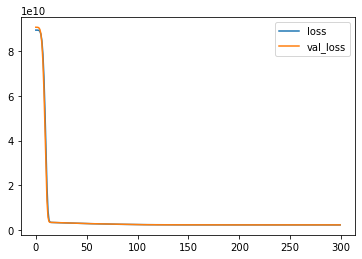

In [141]:
pd.DataFrame(model.history.history).plot()

In [142]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
prediction = model.predict(X_test)


print('\033[1m' + f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')

R2: 0.47
mean absolute error: 36409.97
mean squared error: 2256311053.09
root mean squared error: 47500.64


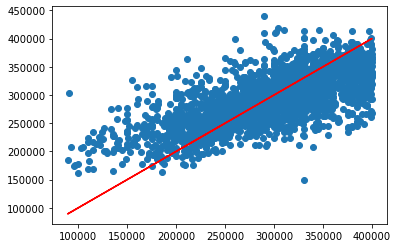

In [143]:
# Our predictions
plt.scatter(y_test,prediction)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Wnioski
Jest to mój pierwszy projekt sieci neuronowej. Do obgadania na spotkaniu.